## World Happiness Report: Exploratory Data Analysis(EDA)

In this notebook, we are going to explore and compare World Happiness Report dataset in 2018 and 2021.

The situation in 2018 and 2021 is very different and accordingly we will compare which aspects have a stronger influence on the level of happiness and which countries have become happier or vice versa.

**Import libraries and load the data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pltSS

df_2018 = pd.read_csv('2018.csv')
df_2018 = df_2018.drop(columns=['Overall rank'])

df_2018 = df_2018.rename(columns={'Country or region': 'Country',
                                  'Score': 'Happines score'})


df_2018.tail()

,Country,Happines score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [2]:
df_2021 = pd.read_csv('2021.csv')
df_2021 = df_2021[[ 'Country name',
                    'Ladder score',
                    'Logged GDP per capita', 
                    'Social support', 
                    'Healthy life expectancy', 
                    'Freedom to make life choices', 
                    'Generosity',
                    'Perceptions of corruption']]

df_2021 = df_2021.rename(columns={'Country name': 'Country',
                                  'Ladder score': 'Happines score',
                                  'Logged GDP per capita': 'GDP per capita'})
df_2021.tail()

,Country,Happines score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
144,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


**Basic information about dataset**

In [3]:
df_2018.info()
df_2018.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       156 non-null    object 
 1   Happines score                156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


,Happines score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


**Unique and dublicated values**

In [4]:
df_2018.duplicated().sum()
df_2018['Country'].unique()

array(['Finland', 'Norway', 'Denmark', 'Iceland', 'Switzerland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'United Kingdom', 'Austria', 'Costa Rica', 'Ireland', 'Germany',
       'Belgium', 'Luxembourg', 'United States', 'Israel',
       'United Arab Emirates', 'Czech Republic', 'Malta', 'France',
       'Mexico', 'Chile', 'Taiwan', 'Panama', 'Brazil', 'Argentina',
       'Guatemala', 'Uruguay', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Malaysia', 'Spain', 'Colombia', 'Trinidad & Tobago', 'Slovakia',
       'El Salvador', 'Nicaragua', 'Poland', 'Bahrain', 'Uzbekistan',
       'Kuwait', 'Thailand', 'Italy', 'Ecuador', 'Belize', 'Lithuania',
       'Slovenia', 'Romania', 'Latvia', 'Japan', 'Mauritius', 'Jamaica',
       'South Korea', 'Northern Cyprus', 'Russia', 'Kazakhstan', 'Cyprus',
       'Bolivia', 'Estonia', 'Paraguay', 'Peru', 'Kosovo', 'Moldova',
       'Turkmenistan', 'Hungary', 'Libya', 'Philippines', 'Honduras',
       'Belarus', 'Turkey

In [5]:
df_2021.duplicated().sum()
df_2021['Country'].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

**Null values**

In [6]:
df_2018.isnull().sum()

Country                         0
Happines score                  0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [7]:
df_2021.isnull().sum()

Country                         0
Happines score                  0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

**Correlation Plot**

<AxesSubplot:>

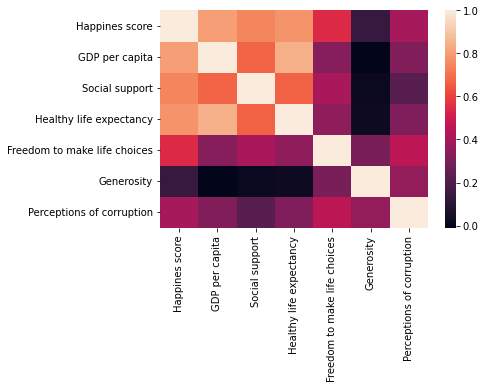

In [8]:
sns.heatmap(df_2018.corr())

<AxesSubplot:>

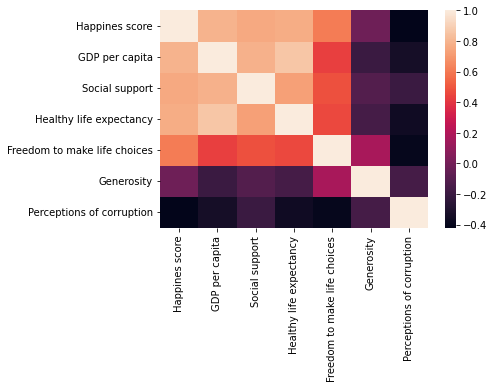

In [9]:
sns.heatmap(df_2021.corr())

**What is the happiest(unhappiest) country in 2018 and in 2019 (Top 20)?**

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize = (15,8))


fig1 = sns.barplot(x='Happines score', y='Country', data=df_2018.nlargest(20,'Happines score'), ax = axes[0], palette = 'coolwarm')
fig2 = sns.barplot(x='Happines score', y='Country', data=df_2021.nlargest(20,'Happines score'), ax = axes[1], palette = 'coolwarm')

fig1.set(xlabel='Happiness ratio', ylabel='Country')
fig2.set(xlabel='Happiness ratio', ylabel='Country')

NameError: name 'plt' is not defined

[Text(0.5, 0, 'Happiness ratio'), Text(0, 0.5, 'Country')]

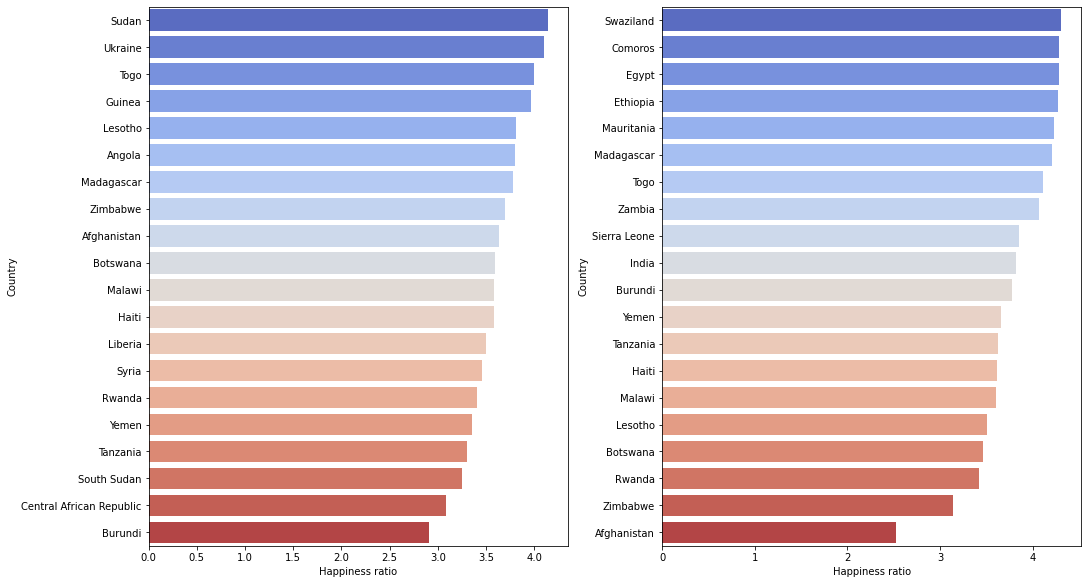

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize = (15,8))


fig1 = sns.barplot(x='Happines score', y='Country', data=df_2018.tail(20).nlargest(20,'Happines score'), ax = axes[0], palette = 'coolwarm')
fig2 = sns.barplot(x='Happines score', y='Country', data=df_2021.tail(20).nlargest(20,'Happines score'), ax = axes[1], palette = 'coolwarm')

fig1.set(xlabel='Happiness ratio', ylabel='Country')
fig2.set(xlabel='Happiness ratio', ylabel='Country')

**What is the ratio of the factors affecting the Happiness Score according to the regions in 2018 and 2021?**

[Text(0.5, 0, 'Percentage of Region'),
 Text(0, 0.5, 'Region'),
 Text(0.5, 1.0, 'Factors affecting happiness score')]

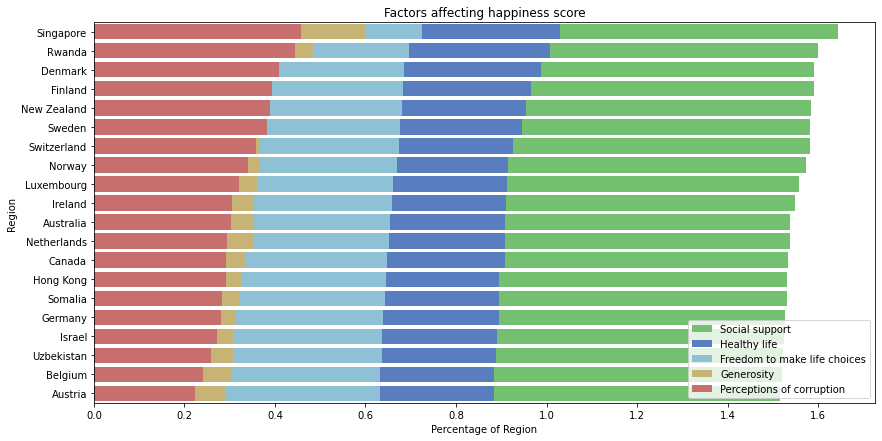

In [ ]:
fig, axes = plt.subplots(figsize = (14,7))

sns.set_color_codes("muted")
sns.barplot(x='Social support', y='Country', data=df_2018.nlargest(20,'Social support'),  color='g', label='Social support')
sns.barplot(x='Healthy life expectancy', y='Country', data=df_2018.nlargest(20,'Healthy life expectancy'), color='b', label='Healthy life')
sns.barplot(x='Freedom to make life choices', y='Country', data=df_2018.nlargest(20,'Freedom to make life choices'), color='c', label='Freedom to make life choices')
sns.barplot(x='Generosity', y='Country', data=df_2018.nlargest(20,'Generosity'), color='y', label='Generosity')
sns.barplot(x='Perceptions of corruption', y='Country', data=df_2018.nlargest(20,'Perceptions of corruption'), color='r', label='Perceptions of corruption')

axes.legend(loc="lower right",frameon = True)
axes.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors affecting happiness score")

[Text(0.5, 0, 'Percentage of Region'),
 Text(0, 0.5, 'Region'),
 Text(0.5, 1.0, 'Factors affecting happiness score')]

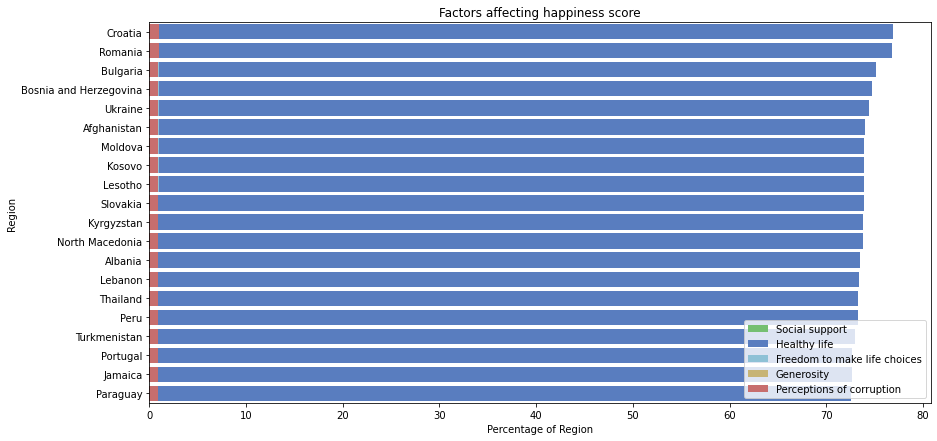

In [ ]:
fig, axes = plt.subplots(figsize = (14,7))

sns.set_color_codes("muted")
sns.barplot(x='Social support', y='Country', data=df_2021.nlargest(20,'Social support'),  color='g', label='Social support')
sns.barplot(x='Healthy life expectancy', y='Country', data=df_2021.nlargest(20,'Healthy life expectancy'), color='b', label='Healthy life')
sns.barplot(x='Freedom to make life choices', y='Country', data=df_2021.nlargest(20,'Freedom to make life choices'), color='c', label='Freedom to make life choices')
sns.barplot(x='Generosity', y='Country', data=df_2021.nlargest(20,'Generosity'), color='y', label='Generosity')
sns.barplot(x='Perceptions of corruption', y='Country', data=df_2021.nlargest(20,'Perceptions of corruption'), color='r', label='Perceptions of corruption')

axes.legend(loc="lower right",frameon = True)
axes.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors affecting happiness score")

**Most Generous and Most Ungenerous Countries in 2018 and 2021**

<AxesSubplot:xlabel='Generosity', ylabel='Country'>

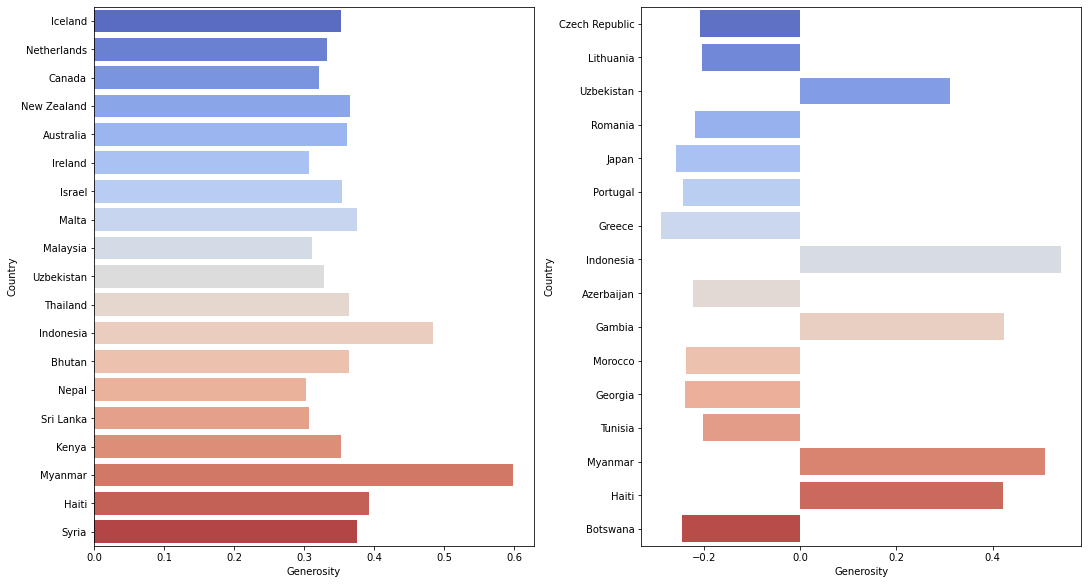

In [ ]:
df_2019_g = df_2018[(df_2018.loc[:, 'Generosity'] > 0.3) | (df_2018.loc[:, 'Generosity'] < 0)]
df_2021_g = df_2021[(df_2021.loc[:, 'Generosity'] > 0.3) | (df_2021.loc[:, 'Generosity'] < -0.2)]

fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize = (15,8))
sns.barplot(x='Generosity', y='Country', data = df_2019_g, ax = axes[0], palette = "coolwarm")
sns.barplot(x='Generosity', y='Country', data = df_2021_g, ax = axes[1], palette = "coolwarm")

**Map vizualization of Happiness score**

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth',
            locations = df_2021['Country'],
            locationmode = 'country names',
            colorscale = 'Spectral',
            z = df_2021['Happines score'],
            text = df_2021['Country'],
            colorbar = {'title': 'Happiness score'})

layout = dict(title = 'Geographical Visualization of Happiness score',
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

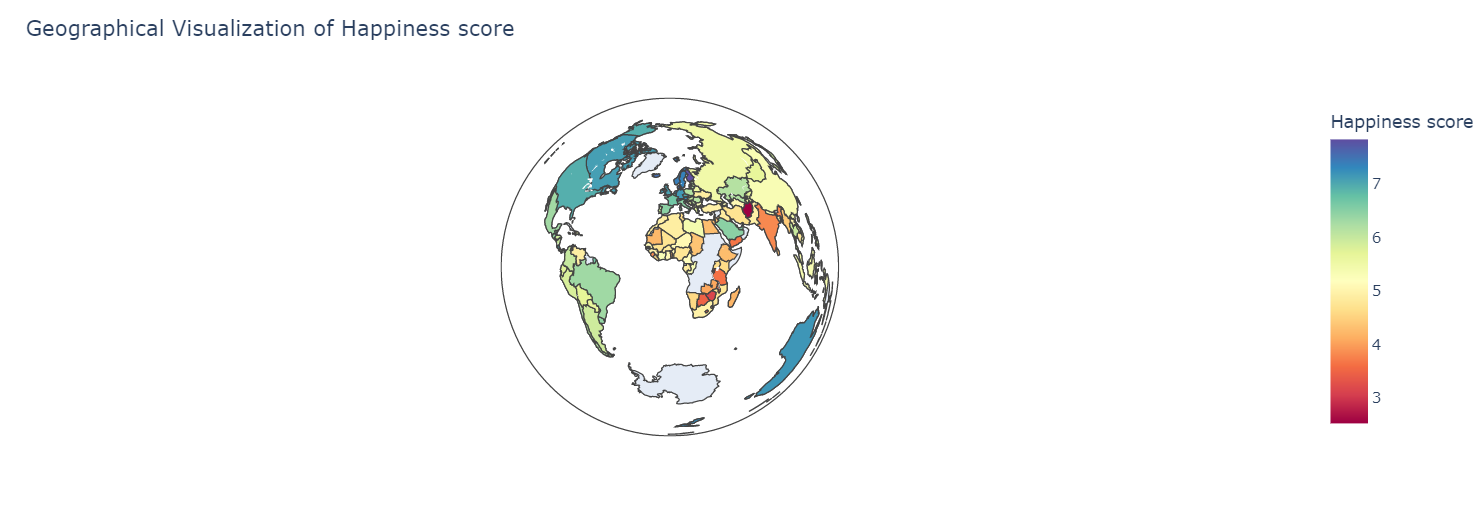

In [ ]:
from IPython.display import Image
Image("map.png")